**LITECOIN(LTC)**

**Project Title: FutureCoin: Machine Learning-Based Crypto Price Prediction**



**1. Project Statement and Outcomes:**
The Cryptocurrency Price Prediction Using Machine Learning project aims to predict future cryptocurrency prices using time-series forecasting. The system will preprocess historical data, build predictive models, and visualize trends to offer valuable insights into future price movements.
2.A system that accurately predicts future cryptocurrency prices using time-series forecasting. It will offer valuable insights into market trends by analyzing historical data and visualizing predicted price movements, helping users make informed decisions in the cryptocurrency market.


**Project Objectives for “FutureCoin: Machine Learning-Based Crypto Price Prediction”**


**MILESTONE1:**
Collect historical cryptocurrency price data from reliable platforms like CoinGecko or Binance. ● Include features such as price, volume, market cap, and timestamp.

● Handle missing values, remove outliers, and normalize the data.

● Convert the data into a suitable format for time-series forecasting.

● Split the dataset into training, validation, and testing sets.

**Milestone 2:**
Week 3-4: Modal Architecture, Training, Evaluation:
● Identify and create relevant features for time-series forecasting (e.g., moving averages, rolling statistics).

● Train machine learning models for time-series forecasting to predict future prices.

● Tune hyperparameters and validate model performance using standard metrics like MSE and MAE.

In [1]:
import pandas as pd
df = pd.read_csv("LTC_cleaned_scaled.csv")

In [2]:
print(df.head())

       Open      High       Low     Close    Volume  Quote Volume    Trades  \
0  0.729150  0.766391  0.740819  0.738712  0.001072      0.001845  0.000493   
1  0.741120  0.766391  0.734724  0.747659  0.005649      0.009447  0.001344   
2  0.750097  0.890651  0.762046  0.816254  0.003506      0.006317  0.001378   
3  0.818924  0.814053  0.783273  0.783835  0.003196      0.005797  0.000961   
4  0.786396  0.790059  0.780241  0.771518  0.001401      0.002522  0.001301   

     HL_PCT  PCT_change                Open Time  
0  0.242607    0.464164  2017-12-13 03:00:00.000  
1  0.270890    0.452800  2017-12-13 04:00:00.000  
2  0.719232    0.664806  2017-12-13 05:00:00.000  
3  0.260808    0.313977  2017-12-13 06:00:00.000  
4  0.158186    0.378577  2017-12-13 07:00:00.000  


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv("LTC_cleaned_scaled.csv")

# Drop non-numeric column
df = df.drop(columns=["Open Time"])

# -----------------------------
# Define features and target
# -----------------------------
TARGET_COL = "Close"

X = df.drop(columns=[TARGET_COL]).values   # features
y = df[TARGET_COL].values                 # target

# -----------------------------
# Sliding window function
# -----------------------------
def make_windows(features, targets, window):
    X_list, y_list = [], []
    for i in range(len(features) - window):
        X_list.append(features[i:i + window])
        y_list.append(targets[i + window])
    return np.array(X_list), np.array(y_list)

# -----------------------------
# Parameters
# -----------------------------
WINDOW = 10
N_SPLITS = 5

# -----------------------------
# Train-test split (last 20%)
# -----------------------------
test_size = int(0.2 * len(X))

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

# -----------------------------
# TimeSeriesSplit setup
# -----------------------------
tscv = TimeSeriesSplit(n_splits=N_SPLITS)

mse_scores, mae_scores, r2_scores = [], [], []

# -----------------------------
# Cross-validation training
# -----------------------------
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train), 1):

    X_tr_seq, y_tr_seq = make_windows(X_train[train_idx], y_train[train_idx], WINDOW)
    X_val_seq, y_val_seq = make_windows(X_train[val_idx], y_train[val_idx], WINDOW)

    # Flatten windows for Linear Regression
    X_tr = X_tr_seq.reshape(X_tr_seq.shape[0], -1)
    X_val = X_val_seq.reshape(X_val_seq.shape[0], -1)

    print(f"\nFold {fold} Shapes: Train={X_tr.shape}, Val={X_val.shape}")

    model = LinearRegression()
    model.fit(X_tr, y_tr_seq)

    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val_seq, y_pred)
    mae = mean_absolute_error(y_val_seq, y_pred)
    r2 = r2_score(y_val_seq, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

    print(f"Fold {fold}: MSE={mse:.6f}, MAE={mae:.6f}, R2={r2:.6f}")

# -----------------------------
# Average CV metrics
# -----------------------------
print("\n=== Average CV Metrics ===")
print(f"Avg MSE : {np.mean(mse_scores):.6f}")
print(f"Avg MAE : {np.mean(mae_scores):.6f}")
print(f"Avg R2  : {np.mean(r2_scores):.6f}")

# -----------------------------
# Final model on full training set
# -----------------------------
X_train_seq, y_train_seq = make_windows(X_train, y_train, WINDOW)
X_test_seq, y_test_seq   = make_windows(X_test, y_test, WINDOW)

X_train_flat = X_train_seq.reshape(X_train_seq.shape[0], -1)
X_test_flat  = X_test_seq.reshape(X_test_seq.shape[0], -1)

final_model = LinearRegression()
final_model.fit(X_train_flat, y_train_seq)

# -----------------------------
# Evaluate on final test set
# -----------------------------
y_test_pred = final_model.predict(X_test_flat)

print("\n=== Final Test Metrics ===")
print(f"MSE : {mean_squared_error(y_test_seq, y_test_pred):.6f}")
print(f"MAE : {mean_absolute_error(y_test_seq, y_test_pred):.6f}")
print(f"R2  : {r2_score(y_test_seq, y_test_pred):.6f}")



Fold 1 Shapes: Train=(1102, 80), Val=(1101, 80)
Fold 1: MSE=0.000480, MAE=0.014584, R2=0.940671

Fold 2 Shapes: Train=(2213, 80), Val=(1101, 80)
Fold 2: MSE=0.000093, MAE=0.004769, R2=0.965424

Fold 3 Shapes: Train=(3324, 80), Val=(1101, 80)
Fold 3: MSE=0.000018, MAE=0.003031, R2=0.995190

Fold 4 Shapes: Train=(4435, 80), Val=(1101, 80)
Fold 4: MSE=0.000012, MAE=0.002380, R2=0.959265

Fold 5 Shapes: Train=(5546, 80), Val=(1101, 80)
Fold 5: MSE=0.000012, MAE=0.002439, R2=0.963878

=== Average CV Metrics ===
Avg MSE : 0.000123
Avg MAE : 0.005441
Avg R2  : 0.964886

=== Final Test Metrics ===
MSE : 0.000010
MAE : 0.001852
R2  : 0.984060


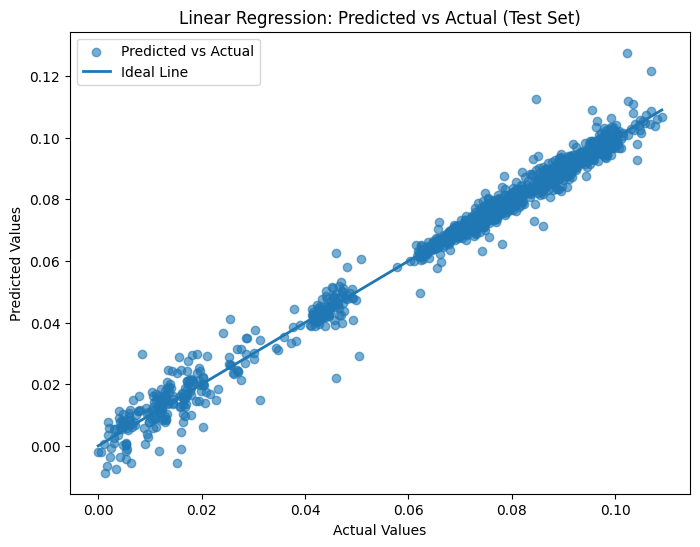

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test_seq, y_test_pred, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test_seq.min(), y_test_seq.max()],
         [y_test_seq.min(), y_test_seq.max()],
         linewidth=2, label='Ideal Line')
plt.title("Linear Regression: Predicted vs Actual (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


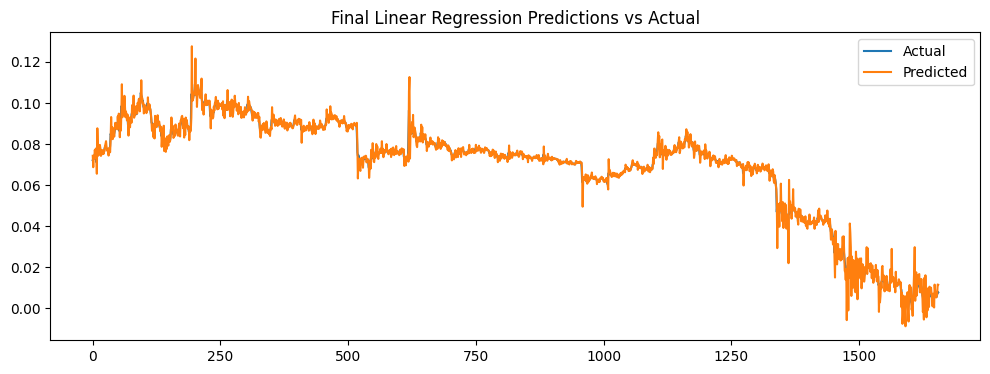

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(y_test_seq, label="Actual")
plt.plot(y_test_pred, label="Predicted")
plt.title("Final Linear Regression Predictions vs Actual")
plt.legend()
plt.show()
